# 9. Condução de calor em uma barra


(Fonte: [Boyce e Diprima, 2020](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/44%5B%3Bvnd.vst.idref%3Dchapter10%5D!/4/418/116/9:66%5B%20fu%2Cn%C3%A7%C3%B5%5D)) Considere o problema de condução de calor em uma barra de seção reta uniforme, feita de material homogêneo, com um eixo $x$ coincidindo com o eixo da barra, sendo $x = 0$ e $x = L$ as extremidades. 

Suponha que os lados da barra estão perfeitamente isolados e que as dimensões da seção reta são tão pequenas que a temperatura $u$ pode ser considerada constante em qualquer seção. Então, $u$ só depende da coordenada axial $x$ e do instante $t$.

<img src="https://raw.githubusercontent.com/tiagoburiol/MatComp_IV/refs/heads/main/imagens/barra.png" width="400"/>

A variação da temperatura na barra é governada pela **equação diferencial parcial** (EDP) conhecida como a **equação do calor**, que pode ser escrita na forma

$$\alpha^2 u_{xx} = u_t, \quad 0<x<L \quad\text{e}\quad t>0 ,$$  

em que  $\alpha^2$ é difusividade térmica, uma constante que depende do material. Alguns valores típicos são mostrados como exemplo na tabela abaixo

Material     |cm$^2$/s| 
-------------|--------|
Cobre        |18,5    |
Aluminio     |0,8418  |
Ferro        |0,23    |
Aço carbono  |0,1172  |
Aço inox     |0,03352 |
Madeira pinus|0,00082 |

O problema fundamental de condução de calor é encontrar $u(x, t)$ que satisfaz a equação diferencial para $0 < x < L$ e para $t > 0$, com a condição inicial 
$$
u(x, 0)=f(x), \quad 0 \leq x \leq L,
$$
quando $t = 0$ e as condições de contorno $T_1$ em $x = 0$ e $T_2$ em $x = L$. Começaremos com as contições de contorno $T_1=T_2=0$,então,

$$u(0, t)=0, \quad u(L, t)=0, \quad t>0.$$

Usando o **método de separação de variáveis**, como descrito em [Boyce (2020, p.331)](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/44%5B%3Bvnd.vst.idref%3Dchapter10%5D!/4/464/7:139%5Ba%20s%2Cupe%5D), é possível concluir que as funções 

$$u_n(x,t) = e^{-n^2\pi^2\alpha^2t/L^2} sen\left(\frac{n\pi x}{L} \right)$$

para $n=1,2,3,...$ satisfazem a equação diferencial parcial e as condições de contorno para cada valor inteiro positivo de $n$. As funções $u_n$ são chamadas, às vezes, de **soluções fundamentais** deste tipo de problema de condução do calor. Para que as soluções fundamentais satisfaçam a condição inicial $u(x,0)=f(x)$ é preciso formar uma combinação linear das funções $u_n$ 

$$u_n(x,t) = \sum_{n=1}^\infty c_n u_n(x,t)$$

escolhendo os coeficientes $c_n$ dados pelas fórmulas de Euler-Fourier

$$c_n= \frac{2}{L} \int_{0}^{L} f(x) \text{sen}\frac{m \pi x}{L}\ dx$$

Assim, a solução deste problema de condução de calor é dada por

$$u_n(x,t) = \sum_{n=1}^\infty c_n e^{-n^2\pi^2\alpha^2t/L^2} \text{sen}\left(\frac{n\pi x}{L} \right)$$

com os coeficientes da série de Fourier.


**Exemplo 1:** Encontre a temperatura $u(x, t)$ em qualquer instante em uma barra de metal com 50 cm de comprimento $\alpha^2 = 1$, isolada nos lados, inicialmente a uma temperatura uniforme de 20 °C em toda a barra e cujas extremidades são mantidas a 0 °C para todo t > 0.

Fazendo $L=50$ e $f(x)=20$ para $0<x<50$, a solução será dada por 

$$u_n(x,t) = \sum_{n=1}^\infty c_n e^{-n^2\pi^2t/2500} sen\left(\frac{n\pi x}{50} \right)$$

com 

$$c_n = \frac{2}{50} \int_{0}^{50} 20 sen\frac{n \pi x}{50} dx = \frac{40}{n\pi}(1-cosn\pi) = \begin{cases}
\frac{80}{n\pi}, \,\,\,  n \,\,\,  ímpar; \\
0, \,\,\, n  \,\,\, par.\\ 
\end{cases}$$

Substituindo, a solução fica

$$u_n(x,t) =\frac{80}{\pi} \sum_{n=1,3,5,...}^\infty \frac{1}{n}e^{-n^2\pi^2t/2500} sen\left(\frac{n\pi x}{50} \right)$$


O fator exponencial com potência negativa em cada termo da série faz com que ela convirja rapidamente, exceto para valores pequenos de $t$. Portanto, resultados precisos podem ser obtidos, em geral, usando-se apenas alguns poucos termos da série.

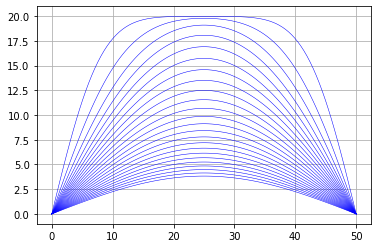

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def u(x,t,N):
    soma = 0
    for n in range(1,N,2):
        soma += (1/n)*np.exp((-n**2*np.pi**2*t)/2500)*np.sin(n*np.pi*x/50)
    return (80/np.pi)*soma

N = 10
x = np.linspace(0,50,100)
for t in range(20,500,20):
    plt.plot(x, [u(xi,t,N) for xi in x],
             color ='b', linewidth = 0.5)
plt.grid()

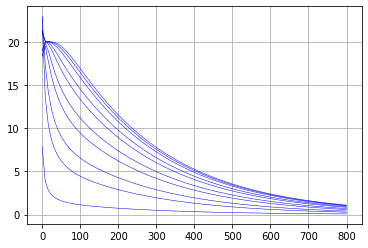

In [35]:
N = 10
t = np.linspace(0,800,100)
for x in range(1,50,5):
    plt.plot(t, [u(x,ti,N) for ti in t],
             color ='b', linewidth = 0.5)
plt.grid()

Um problema com possível aplicação prática é determinar o instante $\tau$ no qual a barra inteira esfriou a determinada temperatura. Por exemplo, quando a temperatura na barra inteira não é maior do que 1 °C? Em face da simetria da distribuição inicial de temperatura e das condições de contorno, o ponto mais quente na barra é sempre o centro. Assim, $\tau$ pode ser encontrado resolvendo-se $u(25, t) = 1$ para $t$. Usando um termo na expansão em série, obtemos 

$$ \tau = \frac{2500}{\pi^2} ln\left(\frac{80}{\pi}\right) \approx 820s.$$

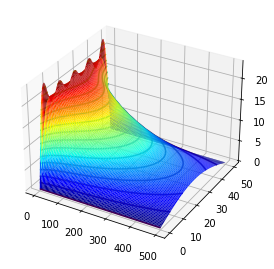

In [88]:
from matplotlib import cm  # color map
from mpl_toolkits.mplot3d import Axes3D

    
x, t = np.meshgrid(np.linspace(0, 50, 101),
                   np.linspace(0, 500, 101))

N = 10 
ui = x.copy()
for i in range(len(x)):
    for j in range(len(t)):
        ui[i,j] = u(x[i,j],t[i,j],N)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(211,projection="3d")
ax.plot_surface(t, x, ui, rstride=1, cstride=1, cmap=cm.jet)
ax.contour(t, x, ui, 20,linewidths=1.5)
    
plt.show()

**Exercícios:** (Fonte: [Boyce (2020)](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/44%5B%3Bvnd.vst.idref%3Dchapter10%5D!/4/550/4/1:46%5Be%20o%2C%20m%C3%A9%5D))

**1.** Encontre a solução do problema de condução de calor

$$
\begin{aligned}
& 100 u_{x x}=u_t, \quad 0<x<1, \quad t>0 \\
& u(0, t)=0, \quad u(1, t)=0, \quad t>0 \\
& u(x, 0)=\operatorname{sen}(2 \pi x)-\operatorname{sen}(5 \pi x), \quad 0 \leq x \leq 1
\end{aligned}
$$


**2.** Encontre a solução do problema de condução de calor

$$
\begin{aligned}
& u_{x x}=4 u_t, \quad 0<x<2, \quad t>0 \\
& u(0, t)=0, \quad u(2, t)=0, \quad t>0 \\
& u(x, 0)=2 \operatorname{sen}(\pi x / 2)-\operatorname{sen}(\pi x)+4 \operatorname{sen}(2 \pi x), \quad 0 \leq x \leq 2
\end{aligned}
$$


Considere a condução de calor em uma barra com 40 cm de comprimento cujas extremidades são mantidas à temperatura $0{ }^{\circ} \mathrm{C}$ para todo $t>0$. Em cada um dos Problemas 3 a 6, encontre uma expressão para a temperatura $u(x, t)$ quando a distribuição de temperatura inicial na barra for igual à função dada. Suponha que $\alpha^2=1$

**3.** $u(x, 0)=50, \quad 0<x<40$

**4.** $u(x, 0)=\left\{\begin{array}{lrl}x, & 0 & \leq x<20 \\ 40-x, & 20 & \leq x \leq 40\end{array}\right.$

**5.** $u(x, 0)=\left\{\begin{array}{lrl}x, & 0 & \leq x<20 \\ 40-x, & 20 & \leq x \leq 40\end{array}\right.$

**6.** $u(x, 0)=x, \quad 0 \leq x<40$

**7.** Considere novamente a barra do Problema 3. Para $t = 5$ e $x = 20$, determine quantos termos são necessários para encontrar a solução correta até três casas decimais. Um modo razoável de fazer isso é encontrar $n$ tal que a inclusão de mais um termo não muda as três primeiras casas decimais de $u(20, 5)$. Repita para $t = 20$ e $t = 80$. Chegue a alguma conclusão sobre a velocidade de convergência da série que representa $u(x, t)$.

**8.** Repita o Problema 7 para a barra no Problema 4.

**9.** Repita o Problema 7 para a barra no Problema 5.

**10.** Repita o Problema 7 para a barra no Problema 6.

### Referências

BOYCE, William E. Equações Diferenciais Elementares e Problemas de Valores de Contorno. São Paulo: Grupo GEN, 2020. E-book. ISBN 9788521637134. Disponível em: https://integrada.minhabiblioteca.com.br/#/books/9788521637134/. Acesso em: 21 abr. 2023.
